# Ensemble_Random Forest

#### reference : http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [1]:
# module import

from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np 


## Iris data load

In [2]:
iris = load_iris()
print(iris.keys())
print(iris.feature_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## normalizaion

###### min_max normalization 사용
###### norm_x = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris.data) # 최대값 최소값알아서찾아줌
norm_data = scaler.transform(iris.data)
iris['data'] = np.array(norm_data)



## train:test = 7:3  학습,테스트 데이터 나누기

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [5]:
X_train

array([[0.58333333, 0.375     , 0.55932203, 0.5       ],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.61111111, 0.41666667, 0.81355932, 0.875     ],
       [0.66666667, 0.20833333, 0.81355932, 0.70833333],
       [0.41666667, 0.29166667, 0.49152542, 0.45833333],
       [0.80555556, 0.5       , 0.84745763, 0.70833333],
       [0.22222222, 0.58333333, 0.08474576, 0.04166667],
       [0.41666667, 0.33333333, 0.69491525, 0.95833333],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.5       , 0.33333333, 0.50847458, 0.5       ],
       [0.19444444, 0.54166667, 0.06779661, 0.04166667],
       [0.55555556, 0.20833333, 0.6779661 , 0.75      ],
       [0.16666667, 0.16666667, 0.38983051, 0.375     ],
       [0.22222222, 0.75      , 0.10169492, 0.04166667],
       [0.38888889, 0.33333333, 0.52542373, 0.5       ],
       [0.58333333, 0.33333333, 0.77966102, 0.83333333],
       [0.22222222, 0.70833333, 0.08474576, 0.125     ],
       [0.58333333, 0.29166667,

## RandomForest 모델 생성

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rf = RandomForestClassifier()

## 모델 트레이닝

In [8]:
# 생성된 모델을 train 데이터를 사용하여 학습시킵니다.
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## 학습된 모델사용하여 테스트

In [9]:
# test 데이터를 사용하여 모델 test를 진행합니다.
rf.predict(X_test)

array([0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1,
       0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1])

In [10]:
# 각각의 test데이터의 3가지 class에 대한 확률을 나타냅니다.
rf.predict_proba(X_test)

array([[1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.1, 0.9],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.9, 0.1],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. 

## Accuracy 확인하기

In [11]:
rf.score(X_test,Y_test)

0.9777777777777777

## Cunfusion matrix 생성하기

In [12]:
actual = iris.target_names[Y_test]
actual

array(['setosa', 'virginica', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor'], dtype='<U10')

In [13]:
preds = iris.target_names[rf.predict(X_test)]
preds

array(['setosa', 'virginica', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor'], dtype='<U10')

In [14]:
cross = pd.crosstab(actual, preds, rownames=['Actual Species'], colnames=['Predicted Species'])
cross

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,15,0,0
versicolor,0,17,0
virginica,0,1,12


## feature importance 보기

In [15]:
importances = rf.feature_importances_
importances

array([0.01657336, 0.01474913, 0.38217103, 0.58650647])

In [16]:
# 그래프로 표현해보기

indices = np.argsort(importances)
indices

array([1, 0, 2, 3], dtype=int64)

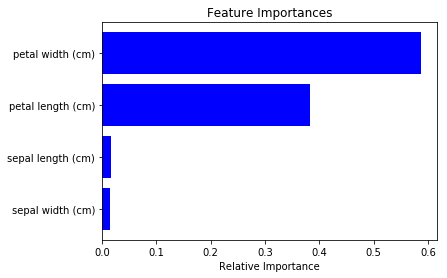

In [17]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [iris.feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()